In [1]:
#import modin.pandas as pd
from pandas_profiling import ProfileReport
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, mean_absolute_error,
                             roc_auc_score)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,
                              RandomForestRegressor)
import xgboost as xgb
import scipy.stats as stats
import requests
import pyforest
import cv2 as cv
import bs4 as bs
import warnings
import time
import re
import random
import os
import math
import datetime
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
# from autoviz.AutoViz_Class import AutoViz_Class

%config InlineBackend.figure_format = 'retina'

#import keras as ks
# import tensorflow as tf

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='plasma', font='Arial', rc={'figure.figsize': (8, 6)})


In [2]:
df=pd.read_csv('./data/salary.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.00,5.50,3.03,1.00,3.25,5.50,7.75,10.00
Salary,10.00,249500.00,299373.88,45000.00,65000.00,130000.00,275000.00,1000000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
ProfileReport(df, title='Pandas Profiling Report')

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


In [6]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [7]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
y


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [9]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10,random_state=123)

In [10]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=123)

In [11]:
regressor.predict([[6.5]])

array([165900.])

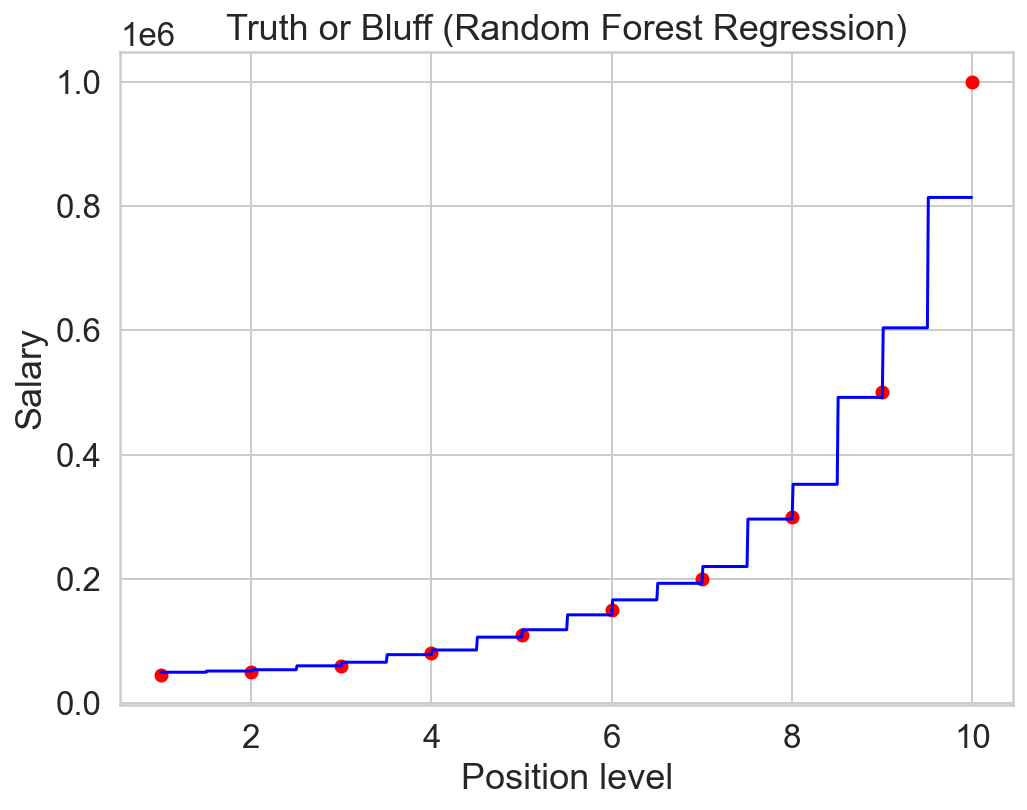

In [12]:
# Visualising the Random Forest Regression results (higher resolution) for 10 decision trees

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

So like Decision Tree Regression, Random Forest regression is also a non-continous model. As in the case of Decision Tree regression, more the number of intervals or more the organized intervals more is the accuracy, number of intervals can be increased by using more number of decision trees so that average of all predicted values will improve the number of intervals upon which algorithm is branched.So let's increase the number of trees and visualise the results.

In [13]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [14]:
y_pred = regressor.predict([[6.5]])
print(y_pred)

[158300.]


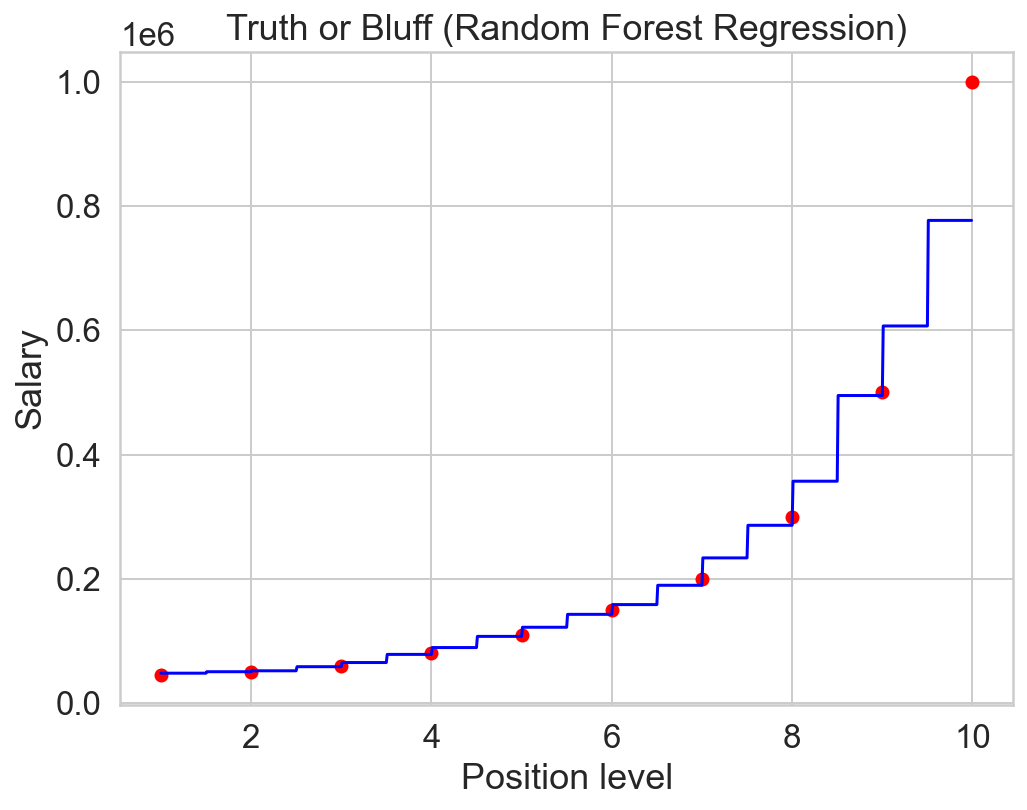

In [15]:
# Visualising the Random Forest Regression results (higher resolution) for 100 decision trees
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

In [16]:
# Fitting Random Forest Regression to the dataset (with 300 decision trees)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=0)

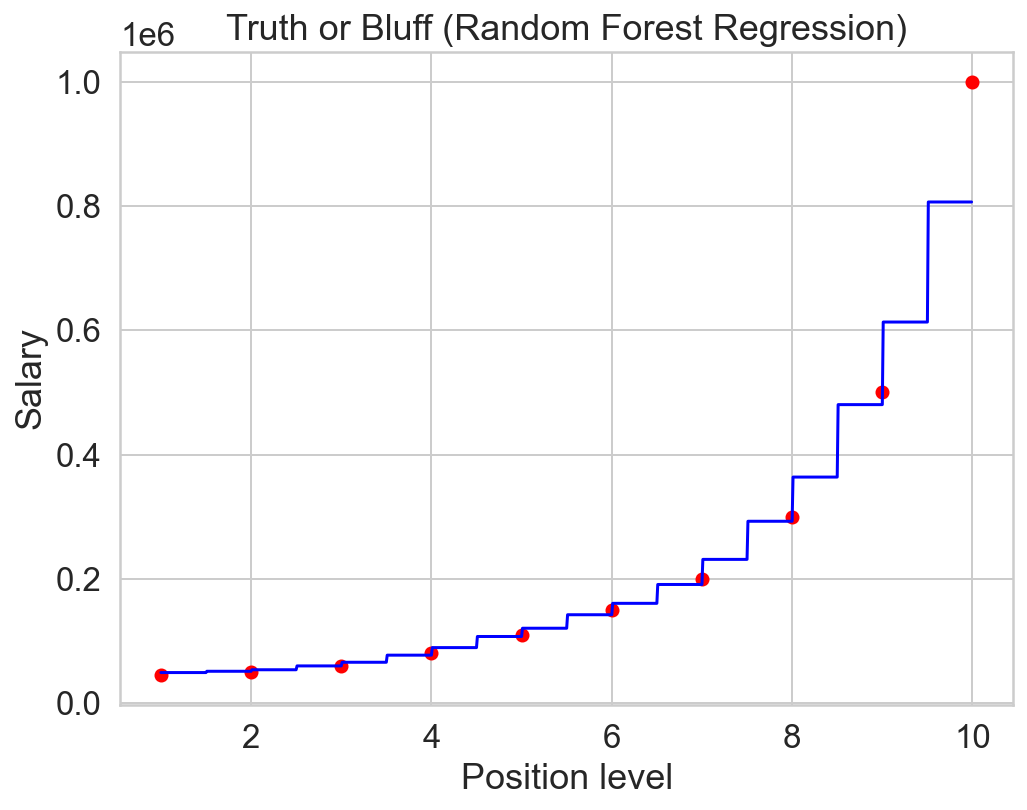

In [17]:
# Visualising the Random Forest Regression results (higher resolution) for 300 decision trees
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();